## Введение 



Сборный проект по курсу **Принятие решений в бизнесе**.

### Описание проекта


**Контекст**
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Часть 1. Приоритизация гипотез.**

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.


*Задача*

1. Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

2.  фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.


*Задача*

Проанализируйте A/B-тест:



1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

4. Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.

5. Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14. Примите решение по результатам теста и объясните его. Варианты решений: `1. Остановить тест, зафиксировать победу одной из групп.` 
`2. Остановить тест, зафиксировать отсутствие различий между группами.` 
`3. Продолжить тест.`


### Описание данных

**Данные для первой части**

Файл `/datasets/hypothesis.csv`. 
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Данные для второй части**

Файл `/datasets/orders.csv`. 
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.


Файл `/datasets/visitors.csv`. 
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Загрузим данные и подготовим их к анализу  

Загружаем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tic

import scipy.stats as stats


import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats as st

#### Загрузка данных

Загрузиv данные для обеих частей из CSV-файлов  в переменные.

**Пути к файлам**

- гипотезы `/datasets/hypothesis.csv`

- заказы `/datasets/orders.csv`
- визиты `/datasets/visitors.csv`

In [2]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except FileNotFoundError:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    

Выведем первые 5 строчек датафреймов `hypothesis`,`orders`,`visitors` на экран.

In [3]:
print('Гипотезы:')
hypothesis

Гипотезы:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
print('Заказы:')
orders.head()

Заказы:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
print('Визиты:')
visitors.head()

Визиты:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Из первых строк невооруженным взглядом пропусков либо проблем с данными не видно.

#### Изучение данных и предобработка

 Выведем основную информацию для датафреймов с помощью метода `info()`.

In [6]:
names = ['Гипотезы (hypothesis)','Заказы (orders)', 'Визиты (visitors)']
tables = hypothesis, orders, visitors
i = 0
for df in tables:
    print('\n', 'Информация о таблице {0!r}:'.format(names[i]), '\n')
    df.info()
    i+=1


 Информация о таблице 'Гипотезы (hypothesis)': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

 Информация о таблице 'Заказы (orders)': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

 Информация 

Из таблицы видно, что часть данных имеет заглавную букву, заменими на строчные и разделим `id` подчеркиванием. Временные данные имеют тип `object`, нужно обработать в дальнейших шагах.

In [7]:
i = 0
for df in tables:
    df.columns = df.columns.str.replace('rI', 'r_i').str.replace('nI', 'n_i').str.lower()
    print('Названия столбцов {}: {}'.format(names[i], df.columns.to_list()), '\n')
    i +=1

Названия столбцов Гипотезы (hypothesis): ['hypothesis', 'reach', 'impact', 'confidence', 'efforts'] 

Названия столбцов Заказы (orders): ['transaction_id', 'visitor_id', 'date', 'revenue', 'group'] 

Названия столбцов Визиты (visitors): ['date', 'group', 'visitors'] 



In [8]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])
print('Тип данных столбцов времени в таблице visitors - {},  \
orders - {}:'.format(visitors['date'].dtypes, orders['date'].dtypes ), '\n')

Тип данных столбцов времени в таблице visitors - datetime64[ns],  orders - datetime64[ns]: 



Данные для столбцов времени для `orders` и для `orders` приведены к нужному типу.

#### Обработка пропусков 

Посмотрим количество пропусков:

In [9]:
i=0
for df in tables:
    print(f'Количество пропусков в таблице {names[i]} - {df.isnull().sum()}',  '\n')
    i+=1

Количество пропусков в таблице Гипотезы (hypothesis) - hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64 

Количество пропусков в таблице Заказы (orders) - transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64 

Количество пропусков в таблице Визиты (visitors) - date        0
group       0
visitors    0
dtype: int64 



Видим, что пропусков нет.
Посмотрим дубликаты в таблицах. 

#### Обработка дубликатов

In [10]:
i=0
for df in tables:
    print(f'Количество дубликатов в таблице {names[i]} - {df.duplicated().sum()}',  '\n')
    i+=1

Количество дубликатов в таблице Гипотезы (hypothesis) - 0 

Количество дубликатов в таблице Заказы (orders) - 0 

Количество дубликатов в таблице Визиты (visitors) - 0 



Видим, что явных дубликатов нет.

#### Обработка дубликатов

In [11]:
orders_visitorsA = orders[orders['group'] == 'A']
orders_visitorsB = orders[orders['group'] == 'B']

print("Уникальных пользователей в группе А:", len(orders_visitorsA['visitor_id'].unique()))
print("Уникальных пользователей в группе В:", len(orders_visitorsB['visitor_id'].unique()))

Уникальных пользователей в группе А: 503
Уникальных пользователей в группе В: 586


Видим, что в тесте участвует в группе `А` -  503, уникальных пользователей в группе `В` -  586.
В соответсвии с логикой построения A/B теста, попавший в одну из групп посетитель должен оставаться в этой группе до конца теста. 
Однако в случае, если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты  теста для этих пользователей нельзя интерпретировать однозначно.

Посмотрим, есть ли повторяющиеся пользователи в каждой группе.

In [12]:
orders_visitors_in_both  = orders_visitorsA[orders_visitorsA['visitor_id']
                                       .isin(orders_visitorsB['visitor_id'])]

print("Повторяющихся пользователей:", len(orders_visitors_in_both['visitor_id'].unique()))
print("Пользователей всего:", len(orders['visitor_id'].unique()))
print("Пользователей без пересечений:", 
      len(orders[np.logical_not(orders['visitor_id'].isin(orders_visitors_in_both['visitor_id']))]['visitor_id'].unique()))
print("Процент неподходящих пользователей:", 
      round(100*(1 - (len(orders[np.logical_not(orders['visitor_id'].isin(orders_visitors_in_both['visitor_id']))]\
                          ['visitor_id'].unique()))/len(orders['visitor_id'].unique())),2))


orders_visitors_in_both 

Повторяющихся пользователей: 58
Пользователей всего: 1031
Пользователей без пересечений: 973
Процент неподходящих пользователей: 5.63


,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
26,2223239646,199603092,2019-08-15,3488,A
29,2220299125,3803269165,2019-08-15,700,A
33,486237576,2378935119,2019-08-15,1650,A
41,2594268419,237748145,2019-08-15,1090,A
...,...,...,...,...,...
1167,3757656646,4186807279,2019-08-14,4990,A
1173,3612788481,2712142231,2019-08-14,2490,A
1178,4052155355,2949041841,2019-08-14,190,A
1183,1458356232,963407295,2019-08-14,4940,A


Мы нашли пересечения пользователей, в идеале нужно удалить этих пользователей, однако в таблице  visitors эти данные в агрегированном качестве, поэтому лучше сделать таблицу, можем ли мы удалить этих пользователей из всех наших данных?

In [13]:
orders = orders[np.logical_not(orders['visitor_id'].isin(orders_visitors_in_both['visitor_id']))]

Создаём таблицу `orders`, очищенную от посетителей из обеих версий.

In [14]:
#группируем таблиу по дням и по группам
orders_visitors_in_both_group = orders_visitors_in_both.groupby(['date','group']).\
                                agg({'transaction_id' : 'nunique'}).reset_index()
orders_visitors_in_both_group.columns = ['date','group','transactions']

In [15]:
#формируем таблицу, очищенную от посещений (в ближайшем приближении - транзакций "неподходящих" пользователей)

visitors_norm = visitors.merge(orders_visitors_in_both_group, on=['date', 'group'], how='left').fillna(0)
visitors_norm ['visitors_norm'] = (visitors_norm['visitors'] - visitors_norm['transactions']).astype(int)


In [16]:
visitors = visitors_norm.drop(columns=['visitors', 'transactions']).rename(columns={'visitors_norm': 'visitors'})

Наиболее ближнем приближении постарались убрать данные из обеих таблиц.

### Вывод

Загрузили данные, привели к строчному значению столбцы и к временномй столбцы со временем.

Видим, что в тесте участвует в группе `А` -  503, уникальных пользователей в группе `В` -  586. Уникальных пользователей 1031.

В соответсвии с логикой построения A/B теста, попавший в одну из групп посетитель должен оставаться в этой группе до конца теста. 
Некоторые пользователи (5.6%) видят разные версии исследуемой страницы в ходе одного исследования,поэтому неизвестно, какая именно версия повлияла на его решение. 
Значит, и результаты  теста для этих пользователей нельзя интерпретировать однозначно.

Очистили данные по `visitors`и `orders`, в масксимальнои приближении. 

## Часть I. Приоритизация гипотез.

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами, расставим приоритеты относительно того, какие гипотезы стоит проверять.

### Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [17]:
hypothesis['ICE'] = round((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'],2)
pd.set_option('display.max_colwidth', 0)
hypothesis.sort_values(by='ICE',ascending =False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


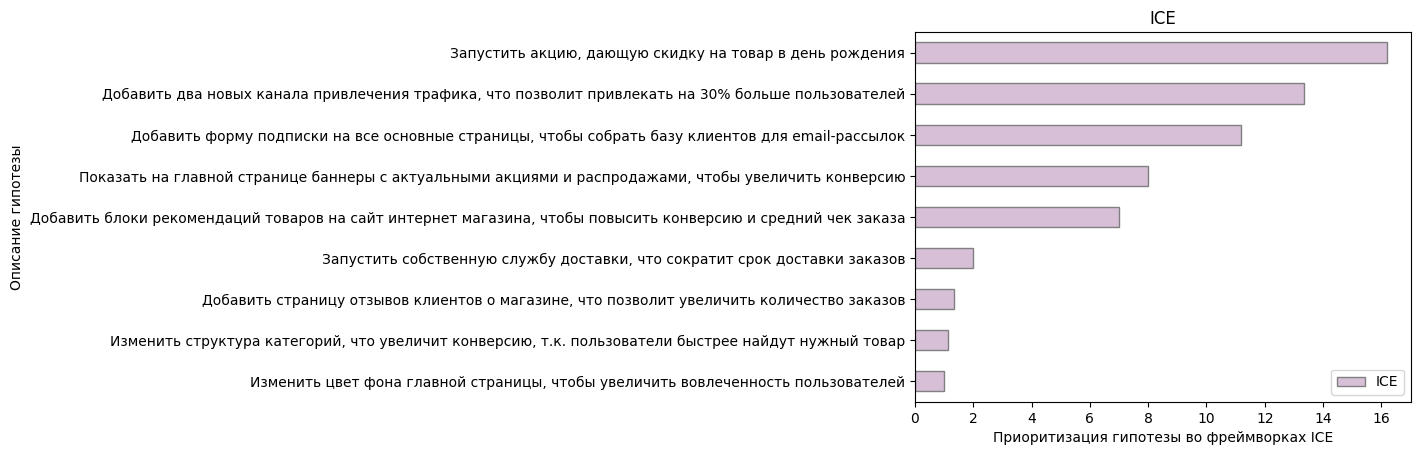

In [18]:
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh',\
    ec='gray',fontsize=10, color='thistle')

ax.set_xlabel('Приоритизация гипотезы во фреймворках ICE')
ax.set_ylabel('Описание гипотезы')
ax.set_title('ICE')
plt.show()

Видим, что наиболее выигрышные гипотезы по методологии `ICE` - гипотезы под индексоми `8`,`0`,`7`,`6`.

### Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [19]:
hypothesis['RICE'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'],2)
hypothesis.sort_values(by='RICE',ascending =False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


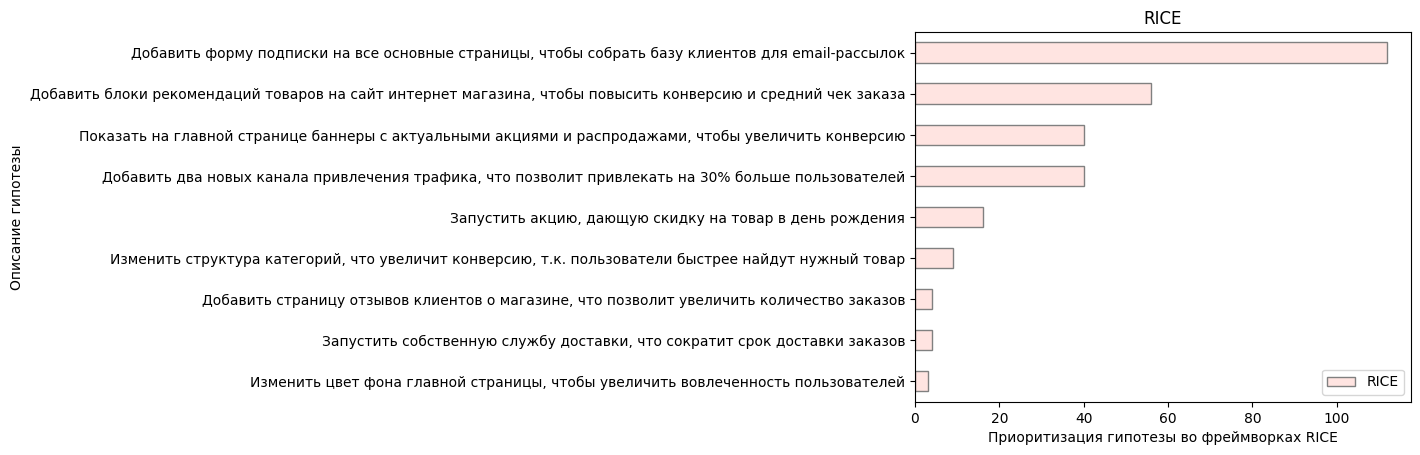

In [20]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh',\
    ec='gray',fontsize=10, color='mistyrose')

ax.set_xlabel('Приоритизация гипотезы во фреймворках RICE')
ax.set_ylabel('Описание гипотезы')
ax.set_title('RICE')
plt.show()

Видим, что наиболее выигрышные гипотезы по методологии `RICE` - гипотезы под индексоми `7`,`2`,`0`,`6`.

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Наиболее выигрышные гипотезы по методологии `ICE` - гипотезы под индексоми `8`,`0`,`7`,`6`.
- 8 - Запустить акцию, дающую скидку на товар в день рождения
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

При этом наиболее выигрышные гипотезы по методологии `RICE` - гипотезы под индексоми `7`,`2`,`0`,`6`.
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

На изменение очередности повлиял параметр охвата (`Reach`), использующийся в методе `RICE`. 
У гипотезы **8** Reach - **1**, т.к. запуск акцию, дающую скидку на товар в день рождения, при достаточно высоком влияние имеет очень маленький охват.

Гипотезa **2**  при относительно невысоком показателе `ICE` за счет значения Reach - **8** получает высокий показаьель по метрике `RICE`. Действительно,  форма подписки на все основные страницы потенциально может влиять на большой круг пользователейю

### Вывод. Промежуточные результаты



С учётом охвата самые актуальные гипотезы, которые необходимо проверять в первую очередь: 
- `7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`
- `2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа`
- `0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`
- `6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию`

## Часть II. Анализ A/B-теста**

Анализ результатов A/B-теста.
Соберем данные в таблицу.

In [21]:
#получим агрегированные кумулятивные по дням данные о заказах и о посетителях
dates_groups = orders[['date','group']].drop_duplicates() 

orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}),\
    axis=1).sort_values(by=['date','group'])

visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединим данные о заказах и о посетителях
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on =['date', 'group'], right_on=['date', 'group'] )
cumulative_data.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

#пропишем средний чек и конверсию
cumulative_data['average_check'] = cumulative_data ['revenue'] / cumulative_data ['transactions']
cumulative_data['conversion'] = cumulative_data ['transactions'] /cumulative_data ['visitors']


cumulative_data.head()


,date,group,transactions,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,23,19,142779,718,6207.782609,0.032033
1,2019-08-01,B,17,17,59758,713,3515.176471,0.023843
2,2019-08-02,A,42,36,234381,1336,5580.500000,0.031437
3,2019-08-02,B,40,39,221801,1294,5545.025000,0.030912
4,2019-08-03,A,66,60,346854,1843,5255.363636,0.035811


### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

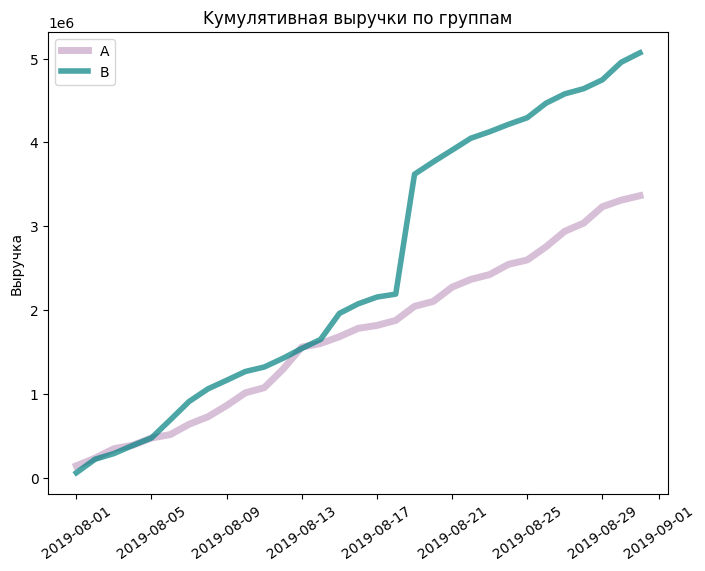

In [22]:
cumulative_revenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'transactions']]
cumulative_revenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'transactions']]


plt.figure(figsize=(8,6)) 

plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A', color= 'thistle',linewidth =5)

plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B', color= 'teal',alpha = 0.7, linewidth=4 )

plt.title('Kумулятивная выручки по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=35)

plt.legend()
plt.show()

В течение всего периода наблюдаем, что кумулятивной выручка группы `B` больше, чем выручка группы `A`.
Версия `B` приносит больше выручки. Однако видим резкий рост у группы `B` после 17ого автгуста, график для группы `A` растет без явных скачков. 
Возможно, однак крупная покупка так исказила график?

###  Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

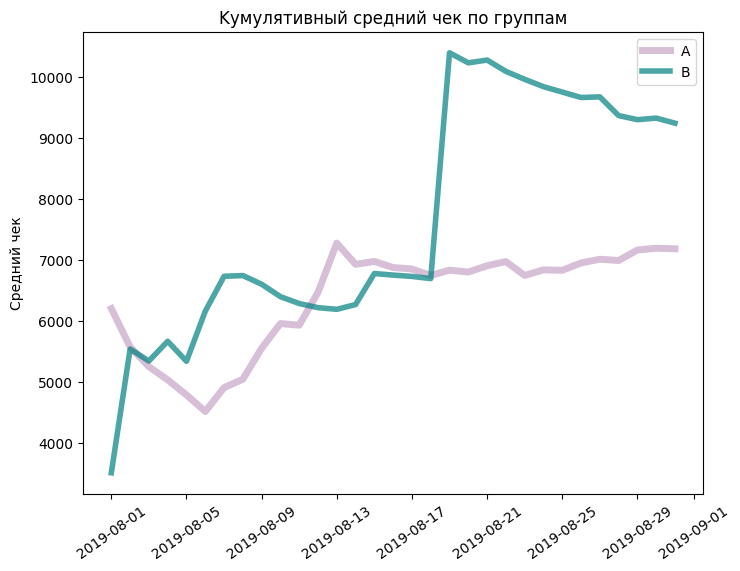

In [23]:
plt.figure(figsize=(8,6)) 


plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['transactions'], 
         label='A', color= 'thistle',linewidth =5)
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['transactions'], 
         label='B', color= 'teal',alpha = 0.7, linewidth=4)



plt.title('Kумулятивный средний чек по группам')
plt.ylabel('Средний чек')

plt.xticks(rotation=35)

plt.legend()
plt.show()


Здесь есть период, когда средний чек по группе `B` чуть ниже, чем у группы `A`.

Здесь также виден резкий рост у группы `B` около 17ого автгуста, график для группы `A` растет без явных скачков. 

###  Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

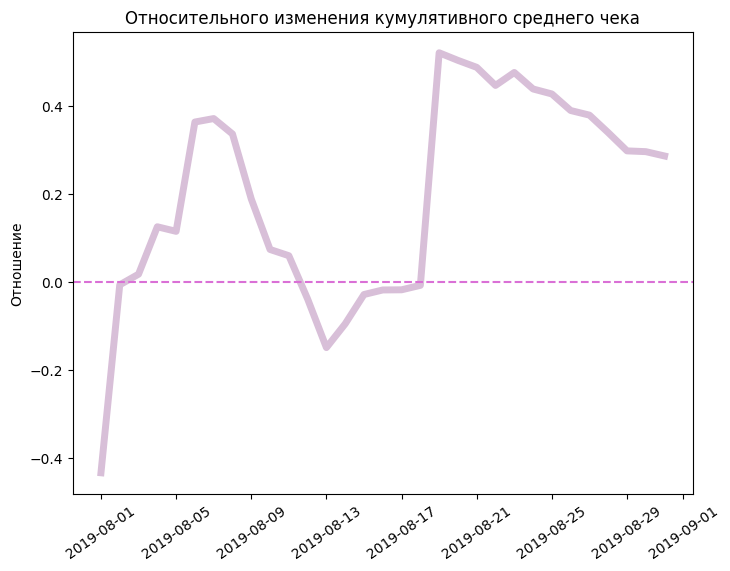

In [24]:
m_сumulative_revenue = cumulative_revenueA.merge(cumulative_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(8,6)) 

plt.plot(m_сumulative_revenue['date'], 
        (m_сumulative_revenue['revenueB']/m_сumulative_revenue['transactionsB'])/
         (m_сumulative_revenue['revenueA']/m_сumulative_revenue['transactionsA'])-1,
         color= 'thistle', linewidth=5)
         

plt.axhline(y=0, color='orchid', linestyle='--') 

plt.title('Относительного изменения кумулятивного среднего чека')
plt.ylabel('Отношение')

plt.xticks(rotation=35)

plt.show()

Здесь также виден резкий рост у группы `B` после 17ого августа, сохраняется похожая картина. 

###  Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.

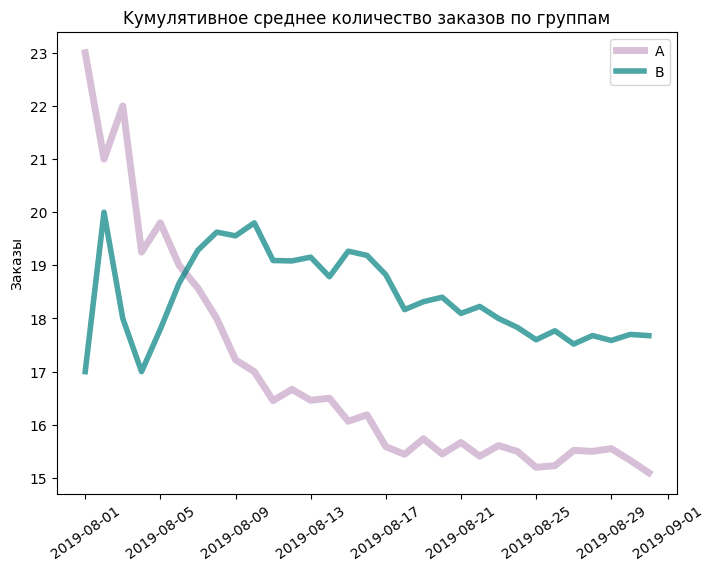

In [25]:
cumulative_dataA = cumulative_data[cumulative_data['group']=='A']  
cumulative_dataB = cumulative_data[cumulative_data['group']=='B']
dataA =  1+(cumulative_dataA['date'] - cumulative_dataA['date'].min()).dt.days


plt.figure(figsize=(8,6)) 

plt.plot(cumulative_dataA['date'], cumulative_dataA['transactions']/
         (1+(cumulative_dataA['date'] - cumulative_dataA['date'].min()).dt.days)
         , label='A', color= 'thistle',linewidth =5)

plt.plot(cumulative_dataB['date'], cumulative_dataB['transactions']/
         (1+(cumulative_dataB['date'] - cumulative_dataB['date'].min()).dt.days), 
         label='B', color= 'teal',alpha = 0.7, linewidth=4 )

plt.title('Kумулятивное среднее количество заказов по группам')
plt.ylabel('Заказы')
plt.xticks(rotation=35)

plt.legend()
plt.show()


Видим, что у группы `В` в целом больше заказов, чем у группы `А`ю

###  Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.

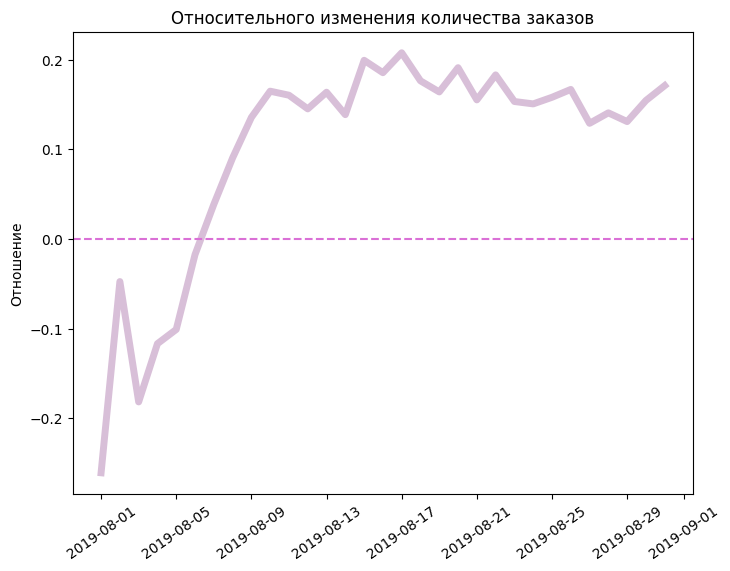

In [26]:
сumulative_data_merged = cumulative_dataA.merge(cumulative_dataB,
                                                 left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(8,6)) 

plt.plot(сumulative_data_merged['date'], 
        (сumulative_data_merged['transactionsB']/сumulative_data_merged['transactionsA'])-1,
         color= 'thistle', linewidth=5)
         

plt.axhline(y=0, color='orchid', linestyle='--') 

plt.title('Относительного изменения количества заказов')
plt.ylabel('Отношение')

plt.xticks(rotation=35)

plt.show()

Видим, что у группы `В` в целом бьольше заказов, чем у группы `А`ю

###  Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

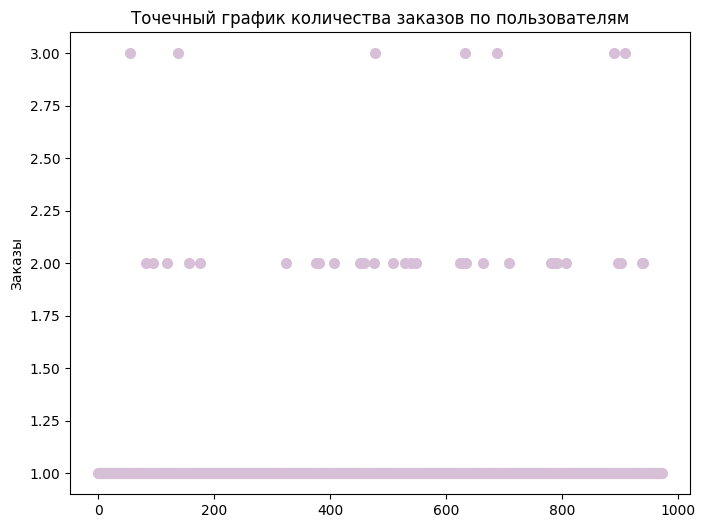

In [27]:
plt.figure(figsize=(8,6)) 

orders_per_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})\
                         .rename(columns={'transaction_id':'orders'})


x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'],  color= 'thistle', linewidth=2)


plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Заказы')



plt.show()

В основном покупатели совершают одну покупку,но есть небольшое количество покупателей, которые делают 2 покупRB, и совсем несколько - 3 покупок.

###  Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [28]:
print(np.percentile(orders_per_user['orders'], [90, 95, 99])) 


[1. 1. 2.]


Не более 5% пользователей оформляли больше чем 2 заказa. И 10% пользователей заказывали более одного раз.
Только 1% заказывает более 4 заказов. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. Удалением таких строк займёмся в следующем уроке.

In [29]:
print("Количество пользователей с более или  3 покупками:",
      len(orders_per_user[orders_per_user['orders'] >= 3]['visitor_id'].unique()))
print("Количество пользователей с более или 2 покупками:",
      len(orders_per_user[orders_per_user['orders'] >= 2]['visitor_id'].unique()))
print("Количество пользователей:",len(orders_per_user['visitor_id'].unique()))


Количество пользователей с более или  3 покупками: 7
Количество пользователей с более или 2 покупками: 36
Количество пользователей: 973


###  Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

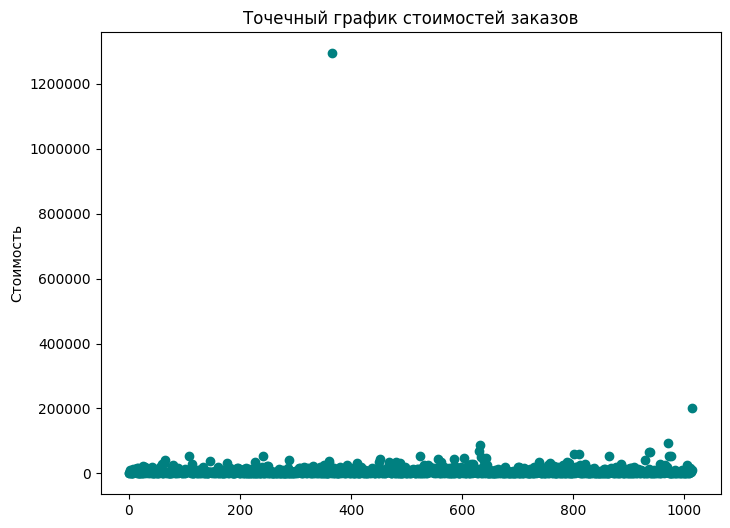

In [30]:
plt.figure(figsize=(8,6)) 

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'],  color= 'teal', linewidth=1)

plt.gca().get_yaxis().set_major_formatter(tic.ScalarFormatter())
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)


plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость')
plt.show()

Из-за двух выбросов график стал малоинформативным, разумно построить график без выбросов.

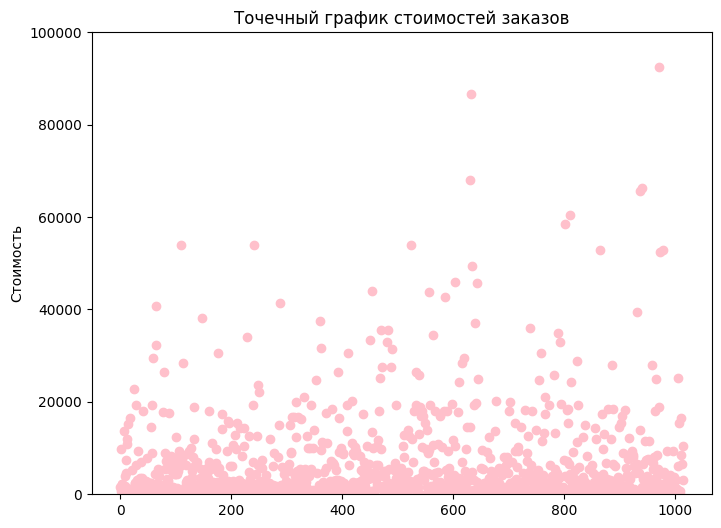

In [31]:
plt.figure(figsize=(8,6)) 

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'],  color= 'pink', linewidth=1)

plt.gca().get_yaxis().set_major_formatter(tic.ScalarFormatter())
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

plt.ylim([0,100000])

plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость')
plt.show()

В основном стоимость покупок не превышеает 100 000, однако есть одна на 200 к, и одна мега-покупка на 1.2 млн. 


###  Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [32]:
print(np.percentile(orders['revenue'], [90, 95,99])) 


[17990. 26785. 53904.]


In [33]:
print("Количество покупок дороже 53 904:",
      len(orders[orders['revenue'] >= 53904]['transaction_id'].unique()))
print("Количество покупок дороже 26 785:",
      len(orders[orders['revenue'] >= 26785]['transaction_id'].unique()))
print("Количество покупок всего:",len(orders['transaction_id'].unique()))


Количество покупок дороже 53 904: 12
Количество покупок дороже 26 785: 51
Количество покупок всего: 1016


Не более 1% покупок (12) имеет стоимость больше 53 904. И 5% покупок имеет стоимость больше 26785.

10% имеет стоимость - 18 000 или более. 
Разумно выбрать 26 785 за верхнюю границу стоимости заказа.

###   Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

Совместим таблицы заказов и посетителей

In [34]:
visitors_dailyA = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_dailyA.columns = ['date', 'visitors_pdateA']
visitors_dailyB = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_dailyB.columns = ['date', 'visitors_pdateB']


visitors_cumA = visitors_dailyA.apply(
    lambda x: visitors_dailyA[visitors_dailyA['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_pdateA': 'sum'}
    ),
    axis=1,
)
visitors_cumA.columns = ['date', 'visitors_cumA']

visitors_cumB = visitors_dailyB.apply(
    lambda x: visitors_dailyB[visitors_dailyB['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_pdateB': 'sum'}
    ),
    axis=1,
)
visitors_cumB.columns = ['date', 'visitors_cumB']

In [35]:
orders_dailyA = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_dailyA.columns = ['date', 'orders_pdateA', 'revenue_pdateA']

orders_dailyB = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_dailyB.columns = ['date', 'orders_pdateB', 'revenue_pdateB']


orders_cumA = orders_dailyA.apply(
    lambda x: orders_dailyA[orders_dailyA['date'] <= x['date']].agg(
        {'date': 'max', 'orders_pdateA': 'sum', 'revenue_pdateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cumA.columns = [
    'date',
    'orders_cumA',
    'revenue_cumA',
]


orders_cumB = orders_dailyB.apply(
    lambda x: orders_dailyB[orders_dailyB['date'] <= x['date']].agg(
        {'date': 'max', 'orders_pdateB': 'sum', 'revenue_pdateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cumB.columns = [
    'date',
    'orders_cumB',
    'revenue_cumB',
]


data = (
    orders_dailyA.merge(
        orders_dailyB, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cumA, left_on='date', right_on='date', how='left')
    .merge(orders_cumB, left_on='date', right_on='date', how='left')
    .merge(visitors_dailyA, left_on='date', right_on='date', how='left')
    .merge(visitors_dailyB, left_on='date', right_on='date', how='left')
    .merge(visitors_cumA, left_on='date', right_on='date', how='left')
    .merge(visitors_cumB, left_on='date', right_on='date', how='left')
)


Посчитаем статистическую значимость различия среднего количества заказов по сырым данным при помощи теста Манна-Уитни. Выведем p-value.

Сформулируем гипотезы.
- **Н0:** Нулевая гипотеза - различий в среднем количестве заказов между группами по «сырым» данным нет. 
- **Н1:** Альтернативная гипотеза -  различия в среднем между группами есть.

Уровень alpha устанавливаем как `0.05`, проверяем гипотезы  критерием «U-критерий Манна-Уитни».

In [36]:
orders_byA = orders[orders['group']=='A'].groupby('visitor_id', as_index = False).agg({'transaction_id':pd.Series.nunique})
orders_byA.columns = ['visitor_id', 'orders']

orders_byB = orders[orders['group']=='B'].groupby('visitor_id', as_index = False).agg({'transaction_id':pd.Series.nunique})
orders_byB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([orders_byA['orders'],
                     pd.Series (0, index=np.arange(
                        data['visitors_pdateA'].sum() - len(orders_byA['orders'])), name = 'orders')],axis = 0)
                                                                                     
sampleB = pd.concat([orders_byB['orders'],
                     pd.Series(0,index = np.arange(data['visitors_pdateB'].sum() - len(orders_byB['orders'])),
                            name = 'orders' )],axis=0)


print('p-value:',"{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Pазличиe в среднем количестве заказов между группами:',"{0:.4f}".format(sampleB.mean()/sampleA.mean()-1))


p-value: 0.0136
Pазличиe в среднем количестве заказов между группами: 0.1543


Видим, что по сырм данным `p-value` меньше `0.05%`.
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 

При этом разница в среднем количестве заказов между группами между группами А и В значительная - `15,4%`.


###   Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитаем статистическую значимость различия средних чеков между группами по сырым данным при помощи теста Манна-Уитни. Выведем p-value для сравнения средних чеков между группами и относительный прирост среднего чека группы B.

Сформулируем гипотезы.
- **Н0:** Нулевая гипотеза - различий в среднем в среднем чеке заказа  между группами по «сырым» данным нет. 
- **Н1:** Альтернативная гипотеза -  различия в в среднем чеке заказа  между группами есть.

Уровень alpha устанавливаем как `0.05`, проверяем гипотезы  критерием «U-критерий Манна-Уитни».

In [37]:
print('p-value:','{0:.4f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'])[1]))
print('Pазличиe в среднем чеке между группами:','{0:.4f}'.format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()) - 1))

p-value: 0.8295
Pазличиe в среднем чеке между группами: 0.2866


Видим, что по сырым данным `p-value`больше `0.05%`, при этом разница между группами А и В значительная - `28,6%`.
Однако результат не значимый. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, отвергнуть не удалось. 


###  Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

Найдем аномальных пользователей.

In [38]:
users_abnormal_orders= pd.concat(
    [
        orders_byA[orders_byA['orders'] > 2]['visitor_id'],
        orders_byA[orders_byA['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)

users_abnormal_revenue = orders[orders['revenue']>26785]['visitor_id']

abnormal_users =  (pd.concat([users_abnormal_orders, users_abnormal_revenue], axis=0)
    .drop_duplicates()
    .sort_values())
abnormal_users.head(5)

568     113298937
1099    148427295
928     204675465
684     358944393
648     382846391
Name: visitor_id, dtype: int64

Сформулируем гипотезы.
- **Н0:** Нулевая гипотеза - различий в среднем количестве заказов между группами по «очищенным» данным нет. 
- **Н1:** Альтернативная гипотеза -  различия в среднем количестве между группами есть.

Уровень alpha устанавливаем как `0.05`, проверяем гипотезы  критерием «U-критерий Манна-Уитни».

In [39]:
sampleA_filtred = pd.concat([orders_byA[np.logical_not(orders_byA['visitor_id'].isin(abnormal_users))]['orders'],
                     pd.Series (0, index=np.arange(
                        data['visitors_pdateA'].sum() - len(orders_byA['orders'])), name = 'orders')],axis = 0)
                                                                                     
sampleB_filtred = pd.concat([orders_byB[np.logical_not(orders_byB['visitor_id'].isin(abnormal_users))]['orders'],
                     pd.Series (0, index=np.arange(
                        data['visitors_pdateB'].sum() - len(orders_byB['orders'])), name = 'orders')],axis = 0)
print('p-value:','{0:.4f}'.format(stats.mannwhitneyu(sampleA_filtred, sampleB_filtred)[1]))
print('Pазличиe в среднем количестве заказов между группами:','{0:.4f}'.format(sampleB_filtred.mean()/sampleA_filtred.mean()-1))

p-value: 0.0127
Pазличиe в среднем количестве заказов между группами: 0.1899


Видим, что по очищенным данным `p-value` меньше `0.05%`.
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 

При этом разница в среднем количестве заказов между группами между группами А и В значительная - `19%`.


###   Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы.
- **Н0:** Нулевая гипотеза - различий в среднем чеке заказа между группами по «очищенным» данным нет. 
- **Н1:** Альтернативная гипотеза -  различия в в среднем чеке заказа  группами есть.

Уровень alpha устанавливаем как `0.05`, проверяем гипотезы  критерием «U-критерий Манна-Уитни».

In [40]:
print('p-value:','{0:.4f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
                orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]))
print('Pазличиe в среднем чеке между группами:','{0:.4f}'.format((orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/
                orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()) - 1))

p-value: 0.6981
Pазличиe в среднем чеке между группами: -0.0408


Видим, что по сырым данным `p-value`больше `0.05%`, при этом разница между группами `А` и `В` изменилась, вариант `В` - `-4%`.
Однако результат все равно не значимый. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, отвергнуть не удалось.


###   Примите решение по результатам теста и объясните его.

Варианты решений: 
- `1. Остановить тест, зафиксировать победу одной из групп.` 
- `2. Остановить тест, зафиксировать отсутствие различий между группами.` 
- `3. Продолжить тест.`

В результате теста видим:

**Среднее количество заказов:**
- по сырым данным лучше у группы `В`  - `16%` 
- по очищенным данным у группы `В`  - `19%` 

**Средний чек:**

- по сырым данным не имеет статистически значимой разницы между группами
- по очищенным данным нет статистически значимой разницы между группами

Тест можно отсавновить и признать победу  группы `В`  с более хорошим средним количеством заказов.